In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import urllib.request
import zipfile

In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
exprData = pd.read_csv("sccovid_data/de_comparison_T-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
exprData

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,count_expr.cells_sympt,min.cells_sympt,lower_hinge.cells_sympt,median.cells_sympt,...,count_expr.cells_asympt,min.cells_asympt,lower_hinge.cells_asympt,median.cells_asympt,upper_hinge.cells_asympt,max.cells_asympt,mean.cells_asympt,sd.cells_asympt,count_all.cells_asympt,cluster
0,AC004687.1,1.114641e-07,0.275654,0.352,0.207,4.079696e-03,245,0.660432,1.126998,1.545731,...,50.0,0.636324,1.078107,1.332292,1.662003,2.944534,1.424837,0.470088,242.0,cluster.tp01
1,ADGRG1,1.146392e-18,0.423142,0.300,0.091,4.195909e-14,209,0.645417,1.145230,1.661138,...,22.0,0.754063,1.024619,1.221992,1.553327,2.663829,1.397371,0.529868,242.0,cluster.tp01
2,AKNA,3.477031e-24,0.509577,0.722,0.471,1.272628e-19,503,0.610563,1.419438,1.959228,...,114.0,0.752873,1.154519,1.439735,1.901083,3.287401,1.551312,0.501603,242.0,cluster.tp01
3,AOAH,4.527662e-17,0.340728,0.234,0.050,1.657169e-12,163,0.773971,1.106544,1.421939,...,12.0,0.901404,1.081267,1.295290,1.807497,2.308365,1.420521,0.462864,242.0,cluster.tp01
4,APMAP,2.406612e-09,0.283058,0.346,0.182,8.808440e-05,241,0.610563,1.033985,1.396353,...,44.0,0.828620,1.056882,1.273606,1.552701,2.088573,1.313566,0.326235,242.0,cluster.tp01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,VPS4A,7.869368e-04,-0.258598,0.131,0.309,1.000000e+00,92,0.334654,0.979038,1.202628,...,34.0,0.620573,0.850818,1.138988,1.646272,2.885305,1.299328,0.554865,110.0,cluster.tp03
365,XIST,7.283651e-32,0.529699,0.202,0.000,2.665889e-27,142,0.679771,1.558638,2.197061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cluster.tp03
366,ZEB2,1.008552e-04,0.301146,0.600,0.427,1.000000e+00,422,0.679771,1.445907,1.822405,...,47.0,0.659664,1.170994,1.536789,2.149126,3.255696,1.729544,0.708178,110.0,cluster.tp03
367,ZNF331,1.065401e-03,-0.256173,0.253,0.464,1.000000e+00,178,0.587360,1.088450,1.496483,...,51.0,0.604926,1.139999,1.561161,1.708741,2.624372,1.470100,0.471334,110.0,cluster.tp03


Creating Range -1.0 -> 1.0
No SD col name given
Current Threshold 0.0
cluster.tp01
(325, 4)
increase 2.0092307692307694
remaining 2 4.03700828402367 2636.166409467456
cluster.tp02
(653, 5)
increase 2.0
remaining 1 2.0 2612.0
cluster.tp03
(1306, 6)
increase 2.003062787136294
remaining 0 1.0 2616.0
Finished
Identified Threshold 0.0
Current Threshold 0.0
cluster.tp01
(325, 4)
increase 2.0092307692307694
remaining 2 4.03700828402367 2636.166409467456
cluster.tp02
(653, 5)
increase 2.0
remaining 1 2.0 2612.0
cluster.tp03
(1306, 6)
increase 2.003062787136294
remaining 0 1.0 2616.0
Finished
['bin.cluster.tp01', 'bin.cluster.tp02', 'bin.cluster.tp03']
['mf.cluster.tp01', 'mf.cluster.tp02', 'mf.cluster.tp03']


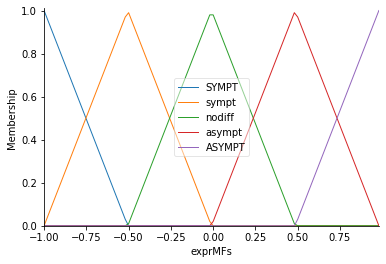

In [4]:
explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, mfLevels = ["SYMPT", "sympt", "nodiff", "asympt", "ASYMPT"], meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True)
explDF = FlowAnalysis.toFlowsDF(explDFRaw)

In [5]:
explDF[explDF.gene == "ABCA1"]

,gene,bin.cluster.tp01,mf.cluster.tp01,bin.cluster.tp02,mf.cluster.tp02,bin.cluster.tp03,mf.cluster.tp03,group.flow,mf.flow,id.flow


In [6]:
pd.set_option("display.max_rows", 200, "display.max_columns", 15)

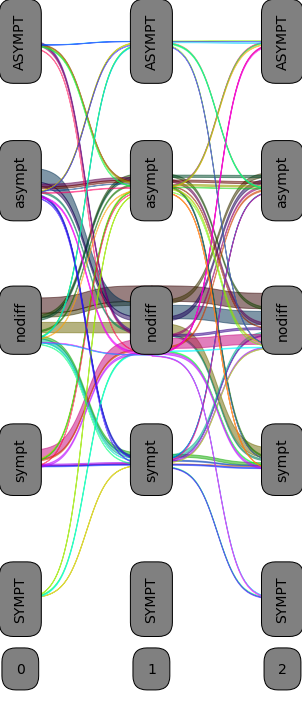

|##########################################################| 100% Time: 0:00:53


In [7]:
fa = FlowAnalysis(explDF, "gene", ( ("0", "0"), ("1", "1"), ("2", "2")), mfFuzzy)

fa.plot_flows()
pwScores = fa.analyse_pathways()

In [8]:
pwScores[pwScores["flow_pw_score"]>0].sort_values("flow_pw_score")

,pwid,pwname,flow_pw_score,pwsize,flow_score,flow_size,pw_gene_intersection,pw_coverage,genes_coverage,pval,chi2,mean_coverage,fgid,adj_pval
2076,R-HSA-201451,Signaling by BMP,0.000003,28,2.266182,206,1,9.352854e-08,0.000001,1.000000e+00,0.000000,1.080815e-13,33,1.000000e+00
849,R-HSA-9664422,FCGR3A-mediated phagocytosis,0.000004,142,0.000004,1,1,3.118416e-08,1.000000,1.000000e+00,0.000000,3.118416e-08,21,1.000000e+00
888,R-HSA-2454202,Fc epsilon receptor (FCERI) signaling,0.000004,210,0.000004,1,1,2.108643e-08,1.000000,1.000000e+00,0.000000,2.108643e-08,21,1.000000e+00
848,R-HSA-9664323,FCGR3A-mediated IL10 synthesis,0.000004,121,0.000004,1,1,3.659629e-08,1.000000,1.000000e+00,0.000000,3.659629e-08,21,1.000000e+00
847,R-HSA-2029481,FCGR activation,0.000004,94,0.000004,1,1,4.710799e-08,1.000000,1.000000e+00,0.000000,4.710799e-08,21,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,R-HSA-1430728,Metabolism,25.519478,2121,44.571938,84,46,1.203181e-02,0.572546,2.290507e-35,154.021951,6.888765e-03,12,4.459273e-32
1108,R-HSA-5663205,Infectious disease,26.869782,1232,44.571938,84,49,2.180989e-02,0.602841,3.607579e-18,75.525282,1.314789e-02,12,3.184529e-15
1344,R-HSA-392499,Metabolism of proteins,27.200580,1947,44.571938,84,49,1.397051e-02,0.610262,5.124795e-31,134.127081,8.525676e-03,12,8.276544e-28
707,R-HSA-1643685,Disease,28.008822,2028,105.364329,303,75,1.381106e-02,0.265828,1.641325e-110,498.909716,3.671370e-03,16,4.665302e-106


In [9]:
pwScores[pwScores.adj_pval < 0.05].sort_values("adj_pval")

,pwid,pwname,flow_pw_score,pwsize,flow_score,flow_size,pw_gene_intersection,pw_coverage,genes_coverage,pval,chi2,mean_coverage,fgid,adj_pval
2064,R-HSA-162582,Signal Transduction,19.477515,2569,105.364329,303,60,0.007582,0.184859,9.924108e-153,693.005608,0.001402,16,1.410414e-147
1095,R-HSA-168256,Immune System,21.933568,2101,105.364329,303,65,0.010440,0.208169,7.611703e-122,551.004450,0.002173,16,5.408876e-117
1326,R-HSA-1430728,Metabolism,23.760720,2121,105.364329,303,63,0.011203,0.225510,9.862255e-121,545.890515,0.002526,16,4.672079e-116
2064,R-HSA-162582,Signal Transduction,15.631157,2569,79.345254,233,47,0.006085,0.197002,2.099432e-112,507.610509,0.001199,1,7.459282e-108
707,R-HSA-1643685,Disease,28.008822,2028,105.364329,303,75,0.013811,0.265828,1.641325e-110,498.909716,0.003671,16,4.665302e-106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,R-HSA-72737,Cap-dependent Translation Initiation,17.034252,124,105.364329,303,44,0.137373,0.161670,1.151338e-04,14.870761,0.022209,16,3.914550e-02
824,R-HSA-72613,Eukaryotic Translation Initiation,17.034252,124,105.364329,303,44,0.137373,0.161670,1.151338e-04,14.870761,0.022209,16,3.914550e-02
2159,R-HSA-9006936,Signaling by TGFB family members,1.569966,121,47.619206,93,3,0.012975,0.032969,1.264893e-04,14.693388,0.000428,40,4.290374e-02
2265,R-HSA-202403,TCR signaling,1.949731,126,47.619206,93,4,0.015474,0.040944,1.309819e-04,14.627603,0.000634,40,4.432179e-02


In [10]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [11]:
relFlows = fa.flow_finder([">", "<"], verbose=False)

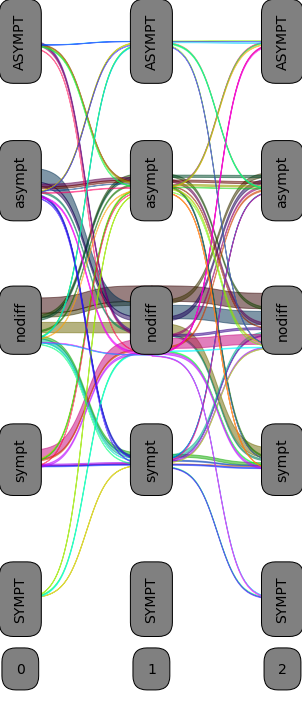

In [12]:
fa.plot_flows()

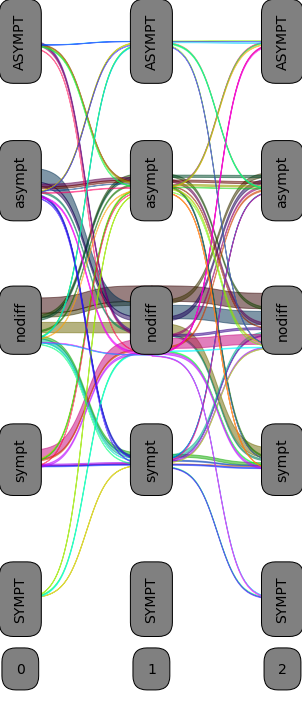

In [13]:
fa.plot_flows(use_flows=relFlows)


(16, 10)


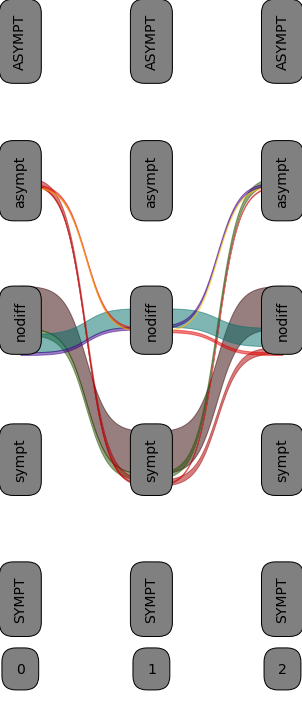

In [14]:
fa.plot_genes(genes=isgListShort)


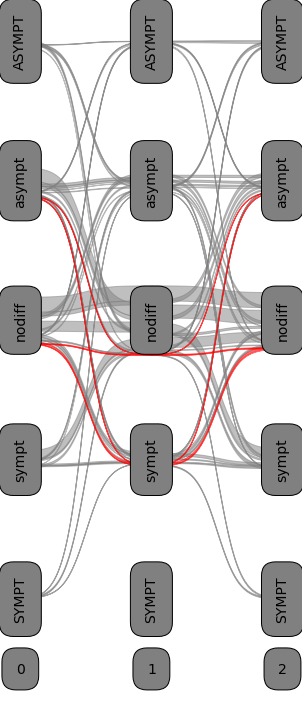

In [15]:
fa.highlight_genes(genes=isgListShort)

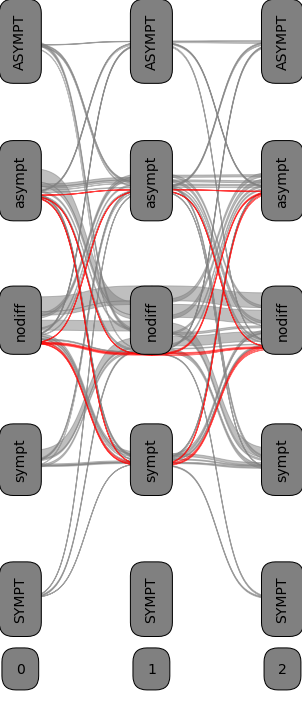

In [16]:
fa.highlight_genes(genes=isgListLong)